final project

An exploratory analysis of the stock market index (CBOE), which is an index of weighted parity with the dollar, consists of 12 factories with the titles () in the first class of production and production of gold bars.
Note: This index is reset and presented after the market closes at the end of the three-month cycle ending on the last Friday of March.


In [21]:
"""-step one_
(Data extraction)
1. Download the data by the library (yfinance) and save them in a (csv) file.
"""
import yfinance as yf

df = yf.download(tickers="CBOE", start="2011-01-01", end="2024-01-01")

df.to_csv("CBOE.csv")


[*********************100%%**********************]  1 of 1 completed


In [22]:
"""-Step two_
(Data clearing)
2. Clear and delete unimportant data"""
import pandas as pd

df = pd.read_csv("CBOE.csv")

df.drop(columns=["Adj Close","Volume"], inplace=True)

df.to_csv("CBOE.csv", index=False)


In [23]:
"""-step tree
(Data scaling and normalization)
3. data scaler , lable encoder , Standardization
"""
import numpy as np
import pandas as pd

df = pd.read_csv("CBOE.csv")

df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].apply(lambda d: d.year).astype(np.uint8)

df["Month"] = df["Date"].apply(lambda d: d.month).astype(np.uint8)

df["Weekday_Num"] = df["Date"].apply(lambda d: d.isoweekday()).astype(np.uint8)

df["Weekday"] = df["Date"].apply(lambda d: d.day_name())

df["Benefit"] = df["Close"]-df["Open"]

df["Tolerance"] = df["High"] - df["Low"]

"""Use the code below to set the date and then insert the (Year) column instead of the index"""

df['Year'] = df['Year'].apply(lambda x: x + 1792)

df.index = df['Year']

df.to_csv('CBOE.csv')

In [24]:
"""-step four_
(Specifying (statistics and probability indicators) data)
4. Statistical indicators, Types of data distribution, Confusion matrix, The correlation coefficient.
1. Statistical indicators."""
import pandas as pd

for i, item in enumerate(["mean","std","min","max"]):
    ndf = pd.DataFrame()

    for d in range(2011, 2024):
        df = pd.read_csv("CBOE.csv")
        dc = df[df["Year"]==d].describe()
        dc.drop(index=["count","25%", "50%", "75%"], columns=[
            "Year","Year.1", "Month", "Weekday_Num"], inplace=True)
        ndf[f"{item}{d}"] = dc.iloc[i]
        ndf.to_csv(f"{item}.csv",index=False)



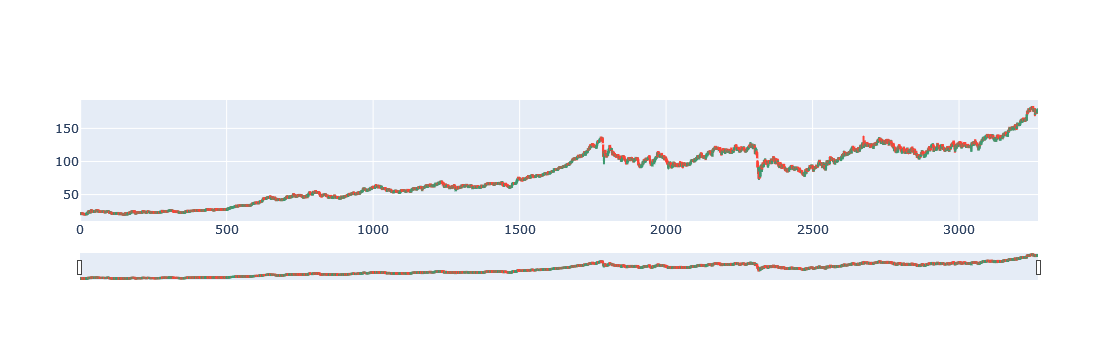

In [25]:
import plotly.graph_objects as go
import pandas as pd


df = pd.read_csv("CBOE.csv")

fig = go.Figure(data=[go.Candlestick(x=df.index, open=df["Open"],
                high=df["High"], low=df["Low"], close=df["Close"])])

fig.show()


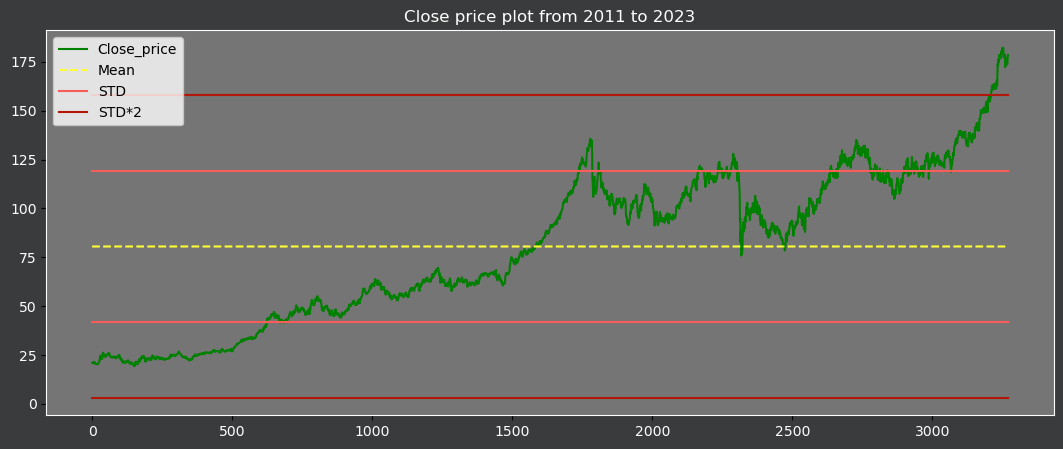

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("CBOE.csv")

close_price = df["Close"]
x = np.arange(len(close_price)) + 1

mean = close_price.mean()
std = close_price.std()
mean_line = np.full_like(close_price, mean)


fig = plt.figure(figsize=(13, 5), facecolor="#3A3B3C")
ax = fig.add_subplot()

ax.plot(x, close_price, label="Close_price", color='green')
plt.gca().set_facecolor('#757575')

# std
ax.plot(mean_line, label="Mean", linestyle="--", color='#FFFF33')
ax.plot([x.min(), x.max()], [mean+std, mean+std],
        label="STD", color="#F75D59", linestyle="-")
ax.plot([x.min(), x.max()], [mean-std, mean-std],
        color="#F75D59", linestyle="-")
# Noise
ax.plot([x.min(), x.max()], [mean+std*2, mean+std*2],
        label="STD*2", color="#B21807", linestyle="-")
ax.plot([x.min(), x.max()], [mean-std*2, mean-std*2],
        color="#B21807", linestyle="-")


# Set tick and axis spine colors to white
plt.title('Close price plot from 2011 to 2023', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
for spine in plt.gca().spines.values():
    spine.set_color('white')
plt.legend(loc="upper left")


plt.savefig('Close_price_plot.png', bbox_inches='tight', dpi=300)
plt.show()

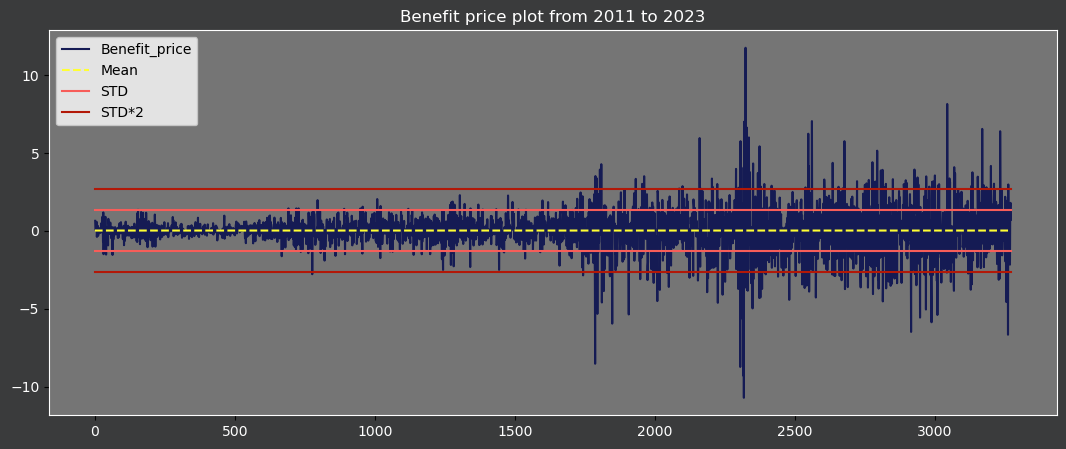

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("CBOE.csv")

Benefit_price = df["Benefit"]
x = np.arange(len(Benefit_price)) + 1

mean = Benefit_price.mean()
std = Benefit_price.std()
mean_line = np.full_like(Benefit_price, mean)


fig = plt.figure(figsize=(13, 5), facecolor="#3A3B3C")
ax = fig.add_subplot()

ax.plot(x, Benefit_price, label="Benefit_price", color='#151B54')
plt.gca().set_facecolor('#757575')

# std
ax.plot(mean_line, label="Mean", linestyle="--", color='#FFFF33')
ax.plot([x.min(), x.max()], [mean+std, mean+std],
        label="STD", color="#F75D59", linestyle="-")
ax.plot([x.min(), x.max()], [mean-std, mean-std],
        color="#F75D59", linestyle="-")
# Noise
ax.plot([x.min(), x.max()], [mean+std*2, mean+std*2],
        label="STD*2", color="#B21807", linestyle="-")
ax.plot([x.min(), x.max()], [mean-std*2, mean-std*2],
        color="#B21807", linestyle="-")


# Set tick and axis spine colors to white
plt.title('Benefit price plot from 2011 to 2023', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
for spine in plt.gca().spines.values():
    spine.set_color('white')
plt.legend(loc="upper left")


plt.savefig('Benefit_price_plot.png', bbox_inches='tight', dpi=300)
plt.show()


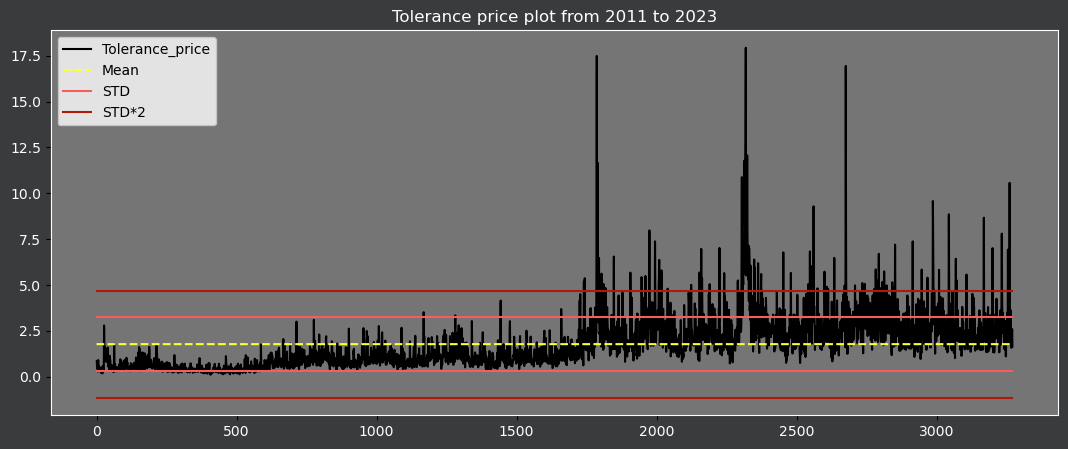

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("CBOE.csv")

Tolerance_price = df["Tolerance"]
x = np.arange(len(Tolerance_price)) + 1

mean = Tolerance_price.mean()
std = Tolerance_price.std()
mean_line = np.full_like(Tolerance_price, mean)


fig = plt.figure(figsize=(13, 5), facecolor="#3A3B3C")
ax = fig.add_subplot()

ax.plot(x, Tolerance_price, label="Tolerance_price", color='#000000')
plt.gca().set_facecolor('#757575')

# std
ax.plot(mean_line, label="Mean", linestyle="--", color='#FFFF33')
ax.plot([x.min(), x.max()], [mean+std, mean+std],
        label="STD", color="#F75D59", linestyle="-")
ax.plot([x.min(), x.max()], [mean-std, mean-std],
        color="#F75D59", linestyle="-")
# Noise
ax.plot([x.min(), x.max()], [mean+std*2, mean+std*2],
        label="STD*2", color="#B21807", linestyle="-")
ax.plot([x.min(), x.max()], [mean-std*2, mean-std*2],
        color="#B21807", linestyle="-")


# Set tick and axis spine colors to white
plt.title('Tolerance price plot from 2011 to 2023', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
for spine in plt.gca().spines.values():
    spine.set_color('white')
plt.legend(loc="upper left")


plt.savefig('Tolerance_price_plot.png', bbox_inches='tight', dpi=300)
plt.show()


In [29]:
"""The first abnormal fall of
	Date
1786 2018-02-05
It has been done and up to
	Date
1792 2018-02-14 has continued until it returns to normal. These days, we are reviewing the news."""
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://money.cnn.com/2018/02/05/investing/stock-market-today-dow-jones/index.html"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
paragraphs = soup.find_all('p')
data = [p.text.strip() for p in paragraphs]
df = pd.DataFrame(data, columns=['Text'])

df.to_csv('2018-02-05.csv', index=False)
print("Data saved to cnn_data.csv")


Data saved to cnn_data.csv


on Date
2020-03-02 It was the beginning of a heavy fall, which we will examine

In [30]:
"""fasting check
2020-03-02"""
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.finsyn.com/february-28-2020-weekly-market-recap/"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    container = soup.find('div', class_='bialty-container')

    if container:
        text_content = container.get_text()
        df = pd.DataFrame({'text': [text_content]})
        df.to_csv('2020-02-28.csv', index=False)
        print("Data saved to output.csv")
        
    else:
        print("Container not found")
else:
    print("Failed to retrieve webpage")

Data saved to output.csv


In [31]:
"""fasting check
2020-03-11"""
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://apnews.com/article/virus-outbreak-financial-markets-united-states-business-ap-top-news-7cd0108d79c6b4f1ee2e6ec5fc3a2275"

response = requests.get(url)

if response.status_code == 200:
    page_content = response.content
    soup = BeautifulSoup(page_content, 'html.parser')
    p_tags = soup.find_all('p')
    p_tag_text = []
    for p in p_tags:
        p_tag_text.append(p.get_text())
    df = pd.DataFrame(p_tag_text, columns=['news_2020-3-11'])
    df.to_csv('2020-3-11.csv', index=False)
    print("Data saved to output.csv")

else:
    print("Failed to retrieve the webpage. Status code: ", response.status_code)

Data saved to output.csv


Next, we will forecast the data

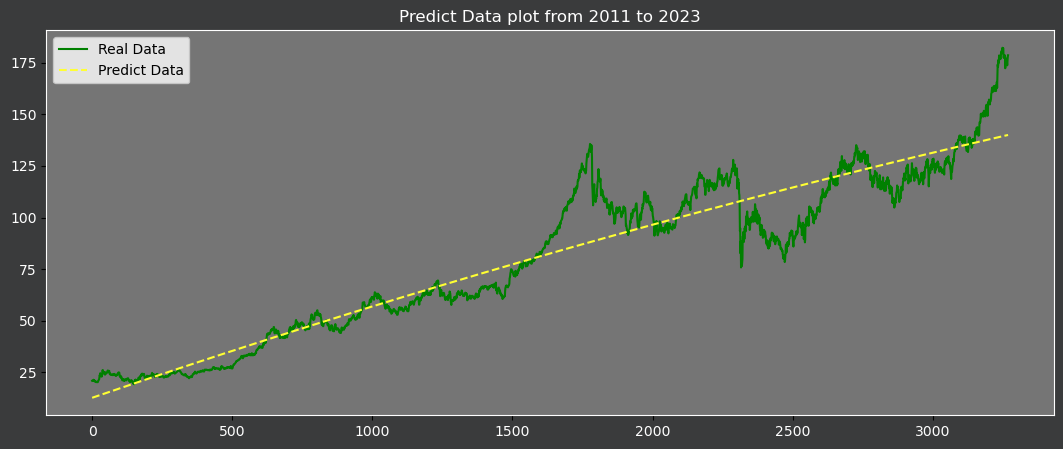

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("CBOE.csv")

y = df["Close"].values
x= np.arange(len(y))

fig = plt.figure(figsize=(13, 5), facecolor="#3A3B3C")
ax = fig.add_subplot()
plt.gca().set_facecolor('#757575')
model = np.poly1d(np.polyfit(x, y, 2))

plt.plot(x, y ,label="Real Data",color='green')
predict = model(x)
plt.plot(x,predict, label= "Predict Data",linestyle="--", color='#FFFF33')
plt.title('Predict Data plot from 2011 to 2023', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
for spine in plt.gca().spines.values():
    spine.set_color('white')
plt.legend(loc="upper left")


plt.savefig('Predict Data_plot.png', bbox_inches='tight', dpi=300)
plt.show()

All RMSE : 12.177804243689609
Train RMSE : 11.998402837764324
Test RMSE : 12.870427279583197


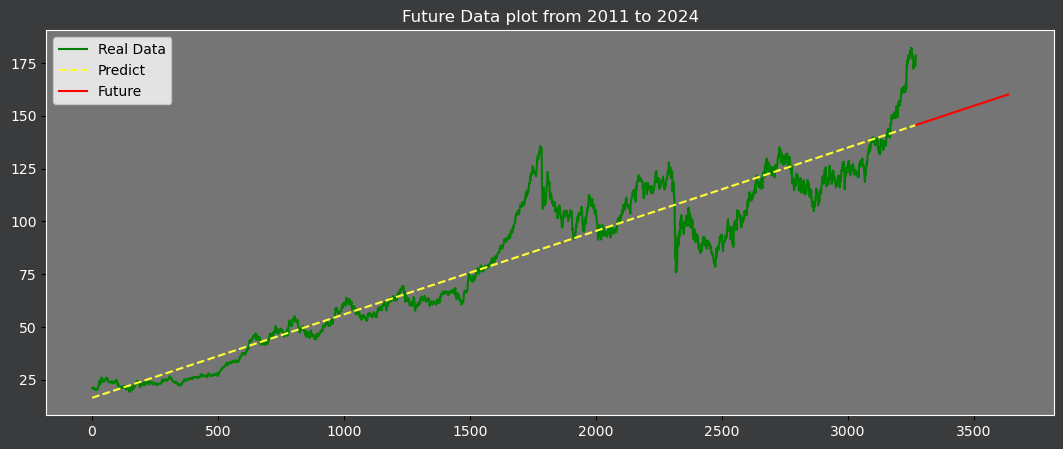

In [33]:
"""In this section, we will draw a forecast for one year from now"""

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv("CBOE.csv")

y = df["Close"]
x = (np.arange(len(df)) + 1).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False)
model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)


all_pred = model.predict(x)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
x_future = np.arange(3271, 3636).reshape(-1, 1)
future_pred = model.predict(x_future)


all_rmse = root_mean_squared_error(y, all_pred)
print("All RMSE :", all_rmse)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
print("Train RMSE :", train_rmse)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print("Test RMSE :", test_rmse)

# Visualize

fig = plt.figure(figsize=(13, 5), facecolor="#3A3B3C")
ax = fig.add_subplot()
plt.gca().set_facecolor('#757575')
plt.title('Future Data plot from 2011 to 2024', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
for spine in plt.gca().spines.values():
    spine.set_color('white')
plt.plot(x, y, label="Real Data",color='green')
plt.plot(x, all_pred, label="Predict",linestyle="--", color='#FFFF33')
plt.plot(x_future, future_pred, label="Future",color='red')
plt.legend(loc="upper left")
plt.savefig('Future Data_plot.png', bbox_inches='tight', dpi=300)
plt.show()


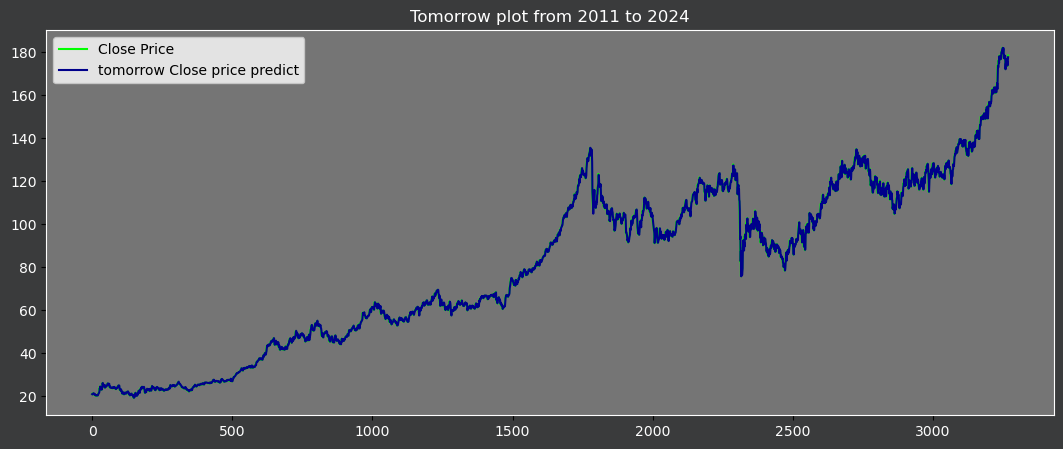

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv("CBOE.csv")

df.dropna(inplace=True)
df["Tomorrow"] = df["Close"].shift(-1)

df.dropna(inplace=True)
x = df[["Open", "Close", "Low", "High"]]
y = df["Tomorrow"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(x_train, y_train)


all_pred = model.predict(x)  
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
all_rmse = root_mean_squared_error(y, all_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

fig = plt.figure(figsize=(13, 5), facecolor="#3A3B3C")
ax = fig.add_subplot()
plt.gca().set_facecolor('#757575')
plt.title('Tomorrow plot from 2011 to 2024', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
for spine in plt.gca().spines.values():
    spine.set_color('white')
plt.plot(x.index,y, label = "Close Price", color = "#00FF00")
plt.plot(x.index, all_pred, label = "tomorrow Close price predict", color = "#00008B")
plt.legend()
plt.show()

We test the predicted value


[*********************100%%**********************]  1 of 1 completed


All RMSE : 13.846542431732173
Train RMSE : 11.770558607547551
Test RMSE : 20.107068775781542


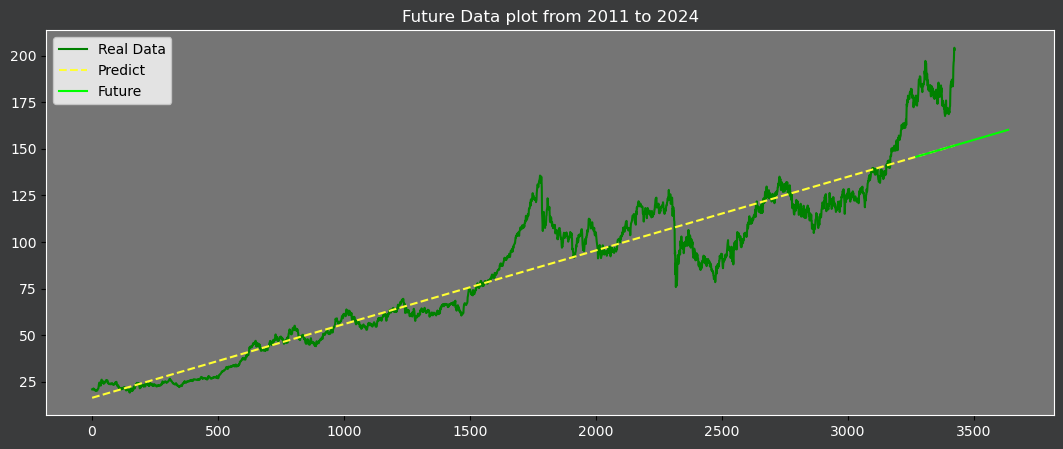

In [35]:
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

df = yf.download(tickers="CBOE", start="2011-01-01")

y = df["Close"]
x = (np.arange(len(df)) + 1).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=False)
model = LinearRegression(n_jobs=-1)
model.fit(x_train, y_train)


all_pred = model.predict(x)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
x_future = np.arange(3271, 3636).reshape(-1, 1)
future_pred = model.predict(x_future)


all_rmse = root_mean_squared_error(y, all_pred)
print("All RMSE :", all_rmse)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
print("Train RMSE :", train_rmse)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print("Test RMSE :", test_rmse)

# Visualize

fig = plt.figure(figsize=(13, 5), facecolor="#3A3B3C")
ax = fig.add_subplot()
plt.gca().set_facecolor('#757575')
plt.title('Future Data plot from 2011 to 2024', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
for spine in plt.gca().spines.values():
    spine.set_color('white')
plt.plot(x, y, label="Real Data",color='green')
plt.plot(x, all_pred, label="Predict",linestyle="--", color='#FFFF33')
plt.plot(x_future, future_pred, label="Future",color='#00FF00')
plt.legend(loc="upper left")
plt.savefig('Future Data_plot.png', bbox_inches='tight', dpi=300)
plt.show()
